In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVR 

№1 Задача регрессии (20 баллов)

Возьмите набор данных согласно своему варианту (https://cloud.mail.ru/public/AQp5/X3obvSZRo). Датасет представляет собой набор признаков, признак в последнем столбце является целевым (его надо прогнозировать).

1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [11]:
df = pd.read_csv("dataset_var9.csv", sep = ";")
df.columns = ["x1","x2","x3","x4","x5","x6","x7","y"]
df.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,-1.356389,NaN,-1.181881,-1.391201,1.543506,0.037504,0.381861,-2.346552
1,-0.165788,NaN,0.169984,0.107304,0.623236,0.595241,0.278370,50.165319
2,1.332388,NaN,1.459883,1.430577,0.935764,-0.980983,-1.185040,143.908415
3,1.079666,1.917896,1.168253,0.498467,0.485840,-0.703119,0.887141,177.522121
4,-0.185958,NaN,-0.748737,-0.399056,0.272874,-0.972504,-1.159621,-136.222029


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      99 non-null     float64
 1   x2      29 non-null     float64
 2   x3      94 non-null     float64
 3   x4      99 non-null     float64
 4   x5      99 non-null     float64
 5   x6      99 non-null     float64
 6   x7      99 non-null     float64
 7   y       99 non-null     float64
dtypes: float64(8)
memory usage: 6.3 KB


In [13]:
df = df.drop('x2', axis=1)
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      94 non-null     float64
 1   x3      94 non-null     float64
 2   x4      94 non-null     float64
 3   x5      94 non-null     float64
 4   x6      94 non-null     float64
 5   x7      94 non-null     float64
 6   y       94 non-null     float64
dtypes: float64(7)
memory usage: 5.9 KB


2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [14]:
df.describe() 

,x1,x3,x4,x5,x6,x7,y
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.120010,-0.090044,0.102304,0.027438,-0.081357,0.048137,-3.634456
std,1.031034,1.122925,2.591698,1.078906,0.945073,1.048488,119.221200
min,-2.715958,-2.328361,-10.205835,-2.834886,-2.134451,-2.278340,-218.373935
25%,-0.494368,-0.960950,-0.755215,-0.720230,-0.812676,-0.733774,-94.218352
50%,0.133107,-0.150698,-0.147520,-0.027088,-0.114552,0.138538,-10.486231
75%,0.836810,0.897871,0.704284,0.818684,0.598233,0.736630,63.769282
max,2.355745,2.211911,17.660875,3.490521,2.153888,2.843674,320.453349


<AxesSubplot: >

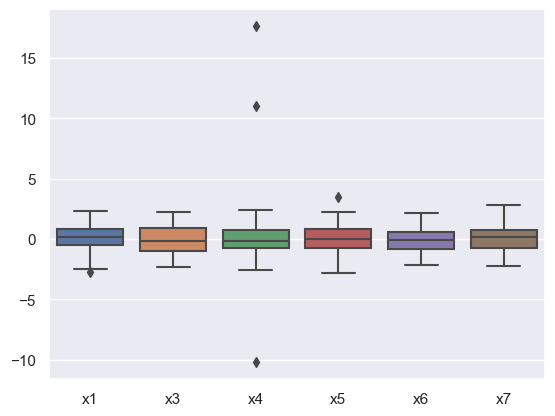

In [15]:
sns.set()
sns.boxplot(data=df.drop('y', axis=1)) 

<AxesSubplot: >

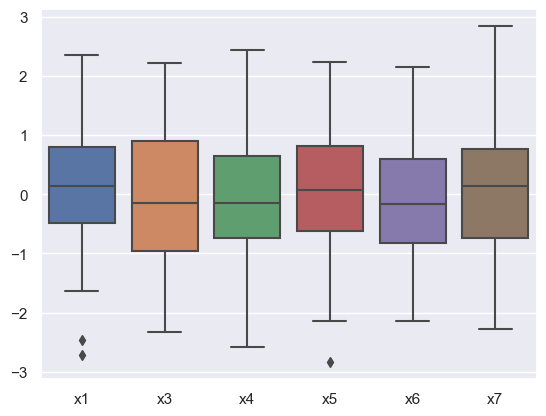

In [16]:
df = df.loc[df['x4'] < 5]
df = df.loc[df['x4'] > -5]
df = df.loc[df['x5'] < 3]

sns.boxplot(data=df.drop('y', axis=1))

In [17]:
df.describe() 

,x1,x3,x4,x5,x6,x7,y
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.116641,-0.091520,-0.083051,0.034859,-0.105252,0.058786,-3.448449
std,1.016730,1.132660,0.978841,1.007476,0.950399,1.056719,120.585349
min,-2.715958,-2.328361,-2.584402,-2.834886,-2.134451,-2.278340,-218.373935
25%,-0.490943,-0.960950,-0.739051,-0.615918,-0.816280,-0.733774,-94.218352
50%,0.133107,-0.139826,-0.147520,0.068678,-0.161385,0.138538,-10.486231
75%,0.793255,0.897871,0.642348,0.818684,0.590850,0.770975,63.769282
max,2.355745,2.211911,2.441815,2.234353,2.153888,2.843674,320.453349


<AxesSubplot: >

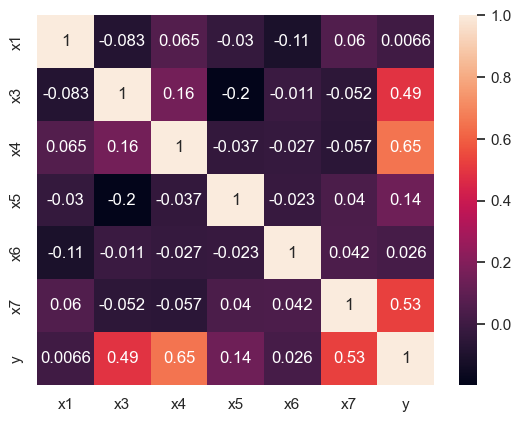

In [18]:
sns.heatmap(df.corr(), annot = True)

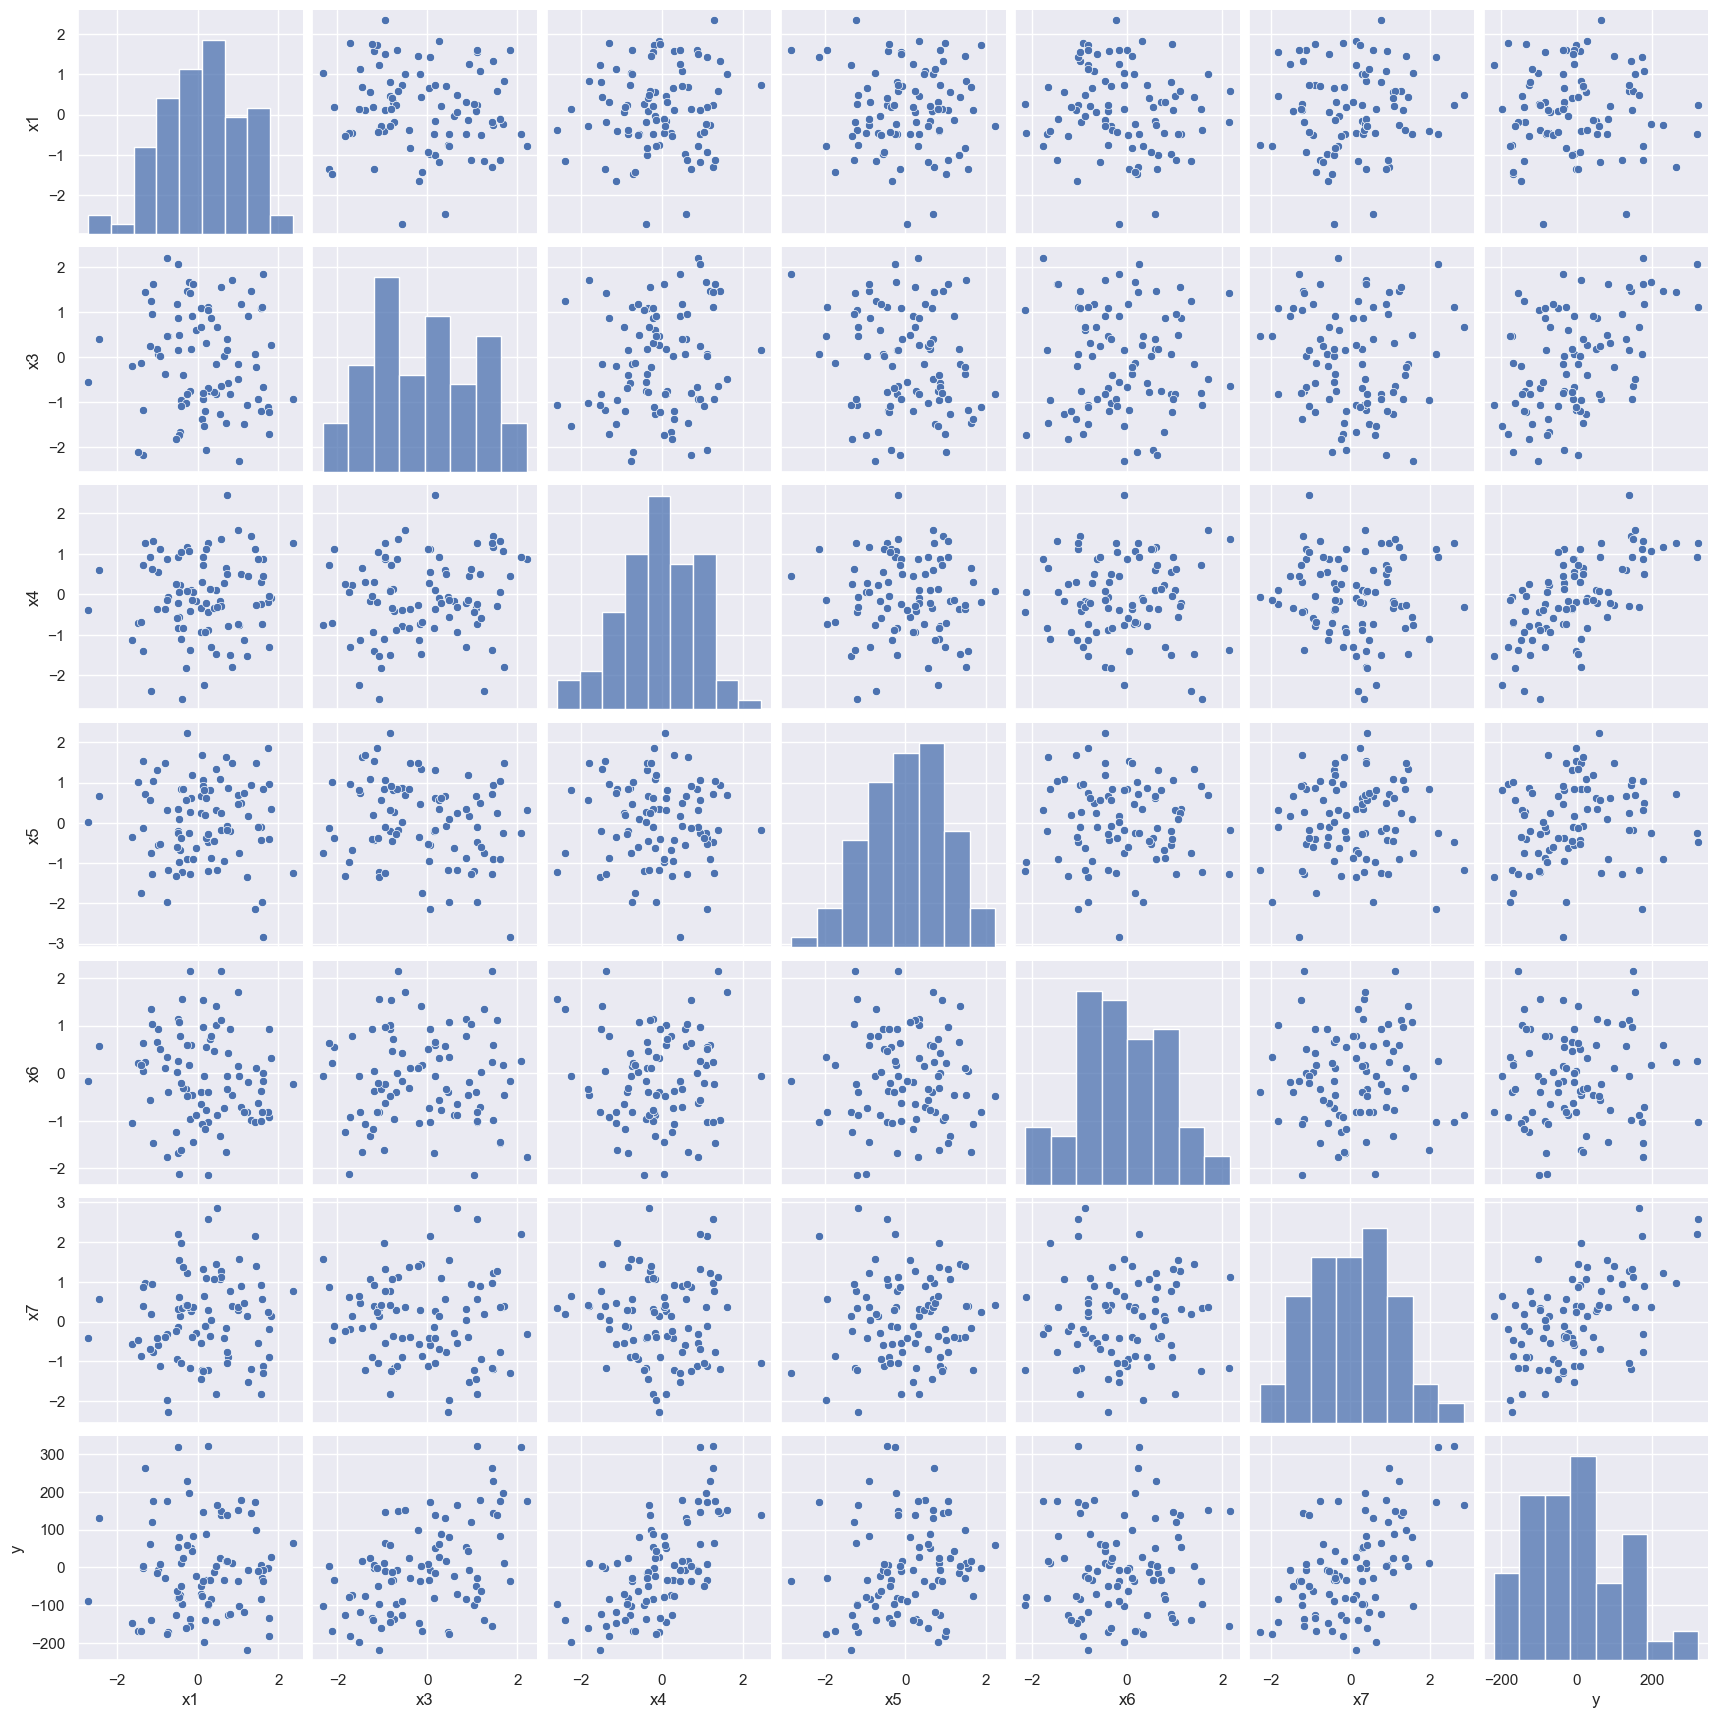

In [19]:
sns.pairplot(df)

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [20]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

4. Для предсказания целевого признака постройте следующие модели, используя библиотеку sklearn:

Линейная регрессия LinearRegression()

Случайный лес RandomForestRegressor()

Метод ближайших соседей KNeighborsRegressor()

Метод опорных векторов SVR()

Логистическая регрессия LogisticRegression()


1. Линейная регрессия LinearRegression()

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9614708379131952

2. Случайный лес RandomForestRegressor()

In [22]:
params = {'max_depth': list(range(20, 31)), 'n_estimators': list(range(100, 401, 20))}
rfr = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(rfr, params, cv = 5, verbose = 1).fit(X, y)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 176 candidates, totalling 880 fits
RandomForestRegressor(max_depth=20, n_estimators=360, random_state=42)
0.7369191425809184


In [23]:
rfr = RandomForestRegressor(max_depth=20, n_estimators=380, random_state=42)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.7036928432640233

3. Метод ближайших соседей KNeighborsRegressor()

In [24]:
params = {"n_neighbors": list(range(1,71))}
knr = KNeighborsRegressor(weights='distance')

gride_search = GridSearchCV(knr, params, cv=5, verbose = 1).fit(X, y)
print(gride_search.best_estimator_)
print(gride_search.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
KNeighborsRegressor(n_neighbors=4, weights='distance')
0.7009617014952709


In [25]:
knr = KNeighborsRegressor(n_neighbors=6, weights='distance')
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.6870072490721189

4. Метод опорных векторов SVR()

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 50, 100, 150, 300, 500]}
svr = SVR(kernel = 'linear', max_iter=10000000)
svr_cv = GridSearchCV(svr, param_grid, cv = 5, verbose = 1).fit(X, y)
print(svr_cv.best_estimator_)
print(svr_cv.best_score_)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVR(C=5, kernel='linear', max_iter=10000000)
0.972336342170436


In [27]:
svr = SVR(C=5, kernel='linear', max_iter=10000000)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.9775079228919303

5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.

Очистил данные от пропавших и выбросов, подобрал моделям гиперпараметры

6. Оцените качество работы моделей. Выведите для каждой модели ее score(). Напишите какая модель дала наилучший результат. Выведите ее значение feature_importances_

In [28]:
svr.coef_ 

array([[-0.91290988, 50.91061149, 80.51658038, 29.36409183,  0.41023576,
        64.05216312]])

№2 Задача классификации (20 баллов)
Возьмите набор данных согласно своему варианту (https://cloud.mail.ru/public/MWZh/DQkbAHKmi). Датасет представляет собой набор признаков, в последнем столбце указан класс объекта.

1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [30]:
df = pd.read_csv("dataset_var9_class.csv", sep = ";") 
df.columns = ["x1","x2","x3","x4","x5","x6","x7","y"]
df.head() 

,x1,x2,x3,x4,x5,x6,x7,y
0,-1.299429,0.125355,0.125355,-1.163337,-0.962949,-0.731920,-1.038950,2
1,1.388374,-1.671656,-1.671656,-0.959611,0.299242,0.038520,-0.131691,1
2,-1.120278,-0.675968,-0.675968,0.657201,-1.679525,1.826580,0.516765,2
3,0.613660,-0.371720,-0.371720,-2.132070,0.710757,-23.178977,0.094916,0
4,0.547625,0.724557,0.724557,1.341882,0.719197,1.577978,0.662333,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      99 non-null     float64
 1   x2      94 non-null     float64
 2   x3      99 non-null     float64
 3   x4      99 non-null     float64
 4   x5      99 non-null     float64
 5   x6      94 non-null     float64
 6   x7      99 non-null     float64
 7   y       99 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 6.3 KB


In [32]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 98
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      89 non-null     float64
 1   x2      89 non-null     float64
 2   x3      89 non-null     float64
 3   x4      89 non-null     float64
 4   x5      89 non-null     float64
 5   x6      89 non-null     float64
 6   x7      89 non-null     float64
 7   y       89 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 6.3 KB


2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [33]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.401352,-0.361256,-0.361256,-0.370095,0.140105,0.534327,-0.097812,1.011236
std,1.382986,1.348763,1.348763,1.555476,1.189787,4.088222,0.955716,0.818735
min,-3.230710,-2.576527,-2.576527,-3.173803,-3.821875,-23.178977,-2.749158,0.000000
25%,-0.507889,-1.198429,-1.198429,-1.478703,-0.364246,-0.540888,-0.733615,0.000000
50%,0.643342,-0.727038,-0.727038,-0.554819,0.355795,0.462155,-0.120422,1.000000
75%,1.486297,-0.047542,-0.047542,0.616446,0.814276,1.535978,0.632307,2.000000
max,2.986474,4.918814,4.918814,3.889433,4.465565,24.732671,1.793674,2.000000


<AxesSubplot: >

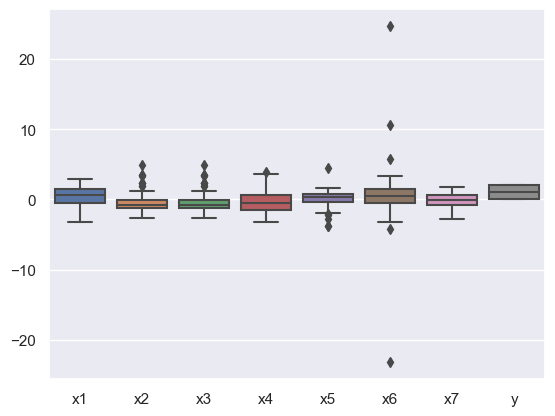

In [34]:
sns.boxplot(data = df)

<AxesSubplot: >

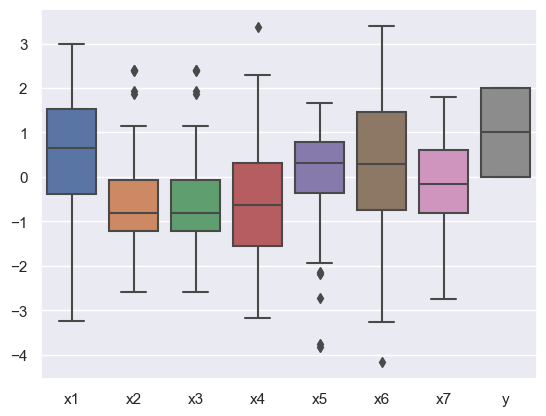

In [35]:
df = df.loc[df['x2'] < 3]

df = df.loc[df['x3'] < 3]

df = df.loc[df['x5'] < 4]

df = df.loc[df['x6'] < 5]
df = df.loc[df['x6'] > -10]

sns.boxplot(data = df)

In [36]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.429282,-0.560191,-0.560191,-0.574732,0.061934,0.294966,-0.160936,0.962963
std,1.408445,1.029501,1.029501,1.354975,1.121242,1.521214,0.953321,0.813087
min,-3.230710,-2.576527,-2.576527,-3.173803,-3.821875,-4.158232,-2.749158,0.000000
25%,-0.386679,-1.205944,-1.205944,-1.548739,-0.367097,-0.731920,-0.811977,0.000000
50%,0.645875,-0.804473,-0.804473,-0.628293,0.322534,0.291649,-0.159310,1.000000
75%,1.535213,-0.072980,-0.072980,0.315658,0.797391,1.467152,0.608007,2.000000
max,2.986474,2.411914,2.411914,3.370863,1.660232,3.393390,1.793674,2.000000


<AxesSubplot: >

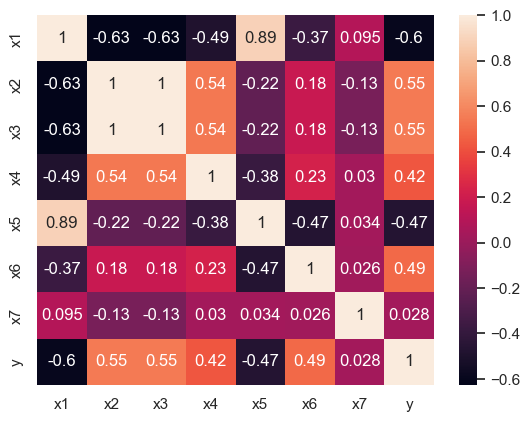

In [37]:
sns.heatmap(df.corr(), annot = True)

In [38]:
df = df.drop('x3', axis=1)

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [39]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

4. Для предсказания класса постройте две модели, используя библиотеку sklearn:

Случайный лес RandomForestClassifier()

Метод ближайших соседей KNeighborsClassifier()

1. Случайный лес RandomForestClassifier()

In [40]:
params = {'max_depth': list(range(20, 30)),'n_estimators': list(range(100, 401, 20))}
rfr = RandomForestClassifier(random_state = 42)

grid = GridSearchCV(rfr, params, cv = 5, verbose = 1)
grid.fit(X, y)

print(grid.best_estimator_) 
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
RandomForestClassifier(max_depth=20, n_estimators=220, random_state=42)
{'max_depth': 20, 'n_estimators': 220}
0.7779411764705882


In [41]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

print(f"Точность случайного леса: {accuracy_score(y_test, rfc.predict(X_test))}")
print(classification_report(y_test, rfc.predict(X_test)))

Точность случайного леса: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.73      0.67        11
           2       0.80      0.80      0.80        10

    accuracy                           0.67        33
   macro avg       0.67      0.68      0.67        33
weighted avg       0.67      0.67      0.66        33



2. Метод ближайших соседей KNeighborsClassifier()

In [42]:
params = {"n_neighbors": list(range(1,51))}
knc = KNeighborsClassifier(weights='distance')

grid = GridSearchCV(knc, params, cv = 5, verbose = 1)
grid.fit(X , y)
print(grid.best_estimator_)
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
KNeighborsClassifier(n_neighbors=3, weights='distance')
{'n_neighbors': 3}
0.8036764705882353


In [43]:
knc = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)

print(f"Точность k ближайших соседей: {accuracy_score(y_test, knc.predict(X_test))}")
print(classification_report(y_test, knc.predict(X_test)))

Точность k ближайших соседей: 0.7878787878787878
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.67      0.91      0.77        11
           2       0.90      0.90      0.90        10

    accuracy                           0.79        33
   macro avg       0.81      0.80      0.79        33
weighted avg       0.81      0.79      0.78        33



3. Логистическая регрессия

In [44]:
parameters = {'C': [0.01, 0.1, 1, 5, 10, 15, 50, 100, 150, 300, 500]} 
logr = LogisticRegression(random_state=42, max_iter=10000000)

grid = GridSearchCV(logr, parameters, cv = 5, verbose = 1)
grid.fit(X , y)

print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
LogisticRegression(C=1, max_iter=10000000, random_state=42)
0.7786764705882353


In [45]:
logr = LogisticRegression(C=5, max_iter=10000000, random_state=42).fit(X_train, y_train)

print(f"Точность логистической регрессии: {accuracy_score(y_test, logr.predict(X_test))}")
print(classification_report(y_test, logr.predict(X_test)))

Точность логистической регрессии: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.73      1.00      0.85        11
           2       0.78      0.70      0.74        10

    accuracy                           0.73        33
   macro avg       0.73      0.73      0.72        33
weighted avg       0.72      0.73      0.71        33



5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.

Очистил данные от пропавших и выбросов, подобрал моделям гиперпараметры

6. Оцените качество работы моделей. Выведите метрики модели. Напишите какая модель дала наилучший результат.

Лучшая модель - это метод ближайших соседей